<a href="https://colab.research.google.com/github/Campeone/CNN-Facial-Emotion-Detection/blob/main/Facial_Emotion_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### READ IN THE IMAGES FILE PATH INTO A DATAFRAME

In [10]:
import pandas as pd

In [13]:
import os

def read_images_in_folders(root_folder):
    data = {'Emotion': [], 'Image_list': []}


    for foldername, subfolders, filenames in os.walk(root_folder):
        for filename in filenames:
            # Assuming the images are in common formats like JPEG, PNG, etc.
            if filename.lower().endswith(('.png')):
                image_path = os.path.join(foldername, filename)
                emotion_class = os.path.relpath(foldername, root_folder)
                data['Image_list'].append(image_path)
                data['Emotion'].append(emotion_class)

    return pd.DataFrame(data)

#### Training Data

In [16]:
train_root_folder = '/content/drive/MyDrive/Facial Emotion/train'
train_images_csv = read_images_in_folders(train_root_folder)

In [18]:
train_images_csv

,Emotion,Image_list
0,angry,/content/drive/MyDrive/Facial Emotion/train/an...
1,angry,/content/drive/MyDrive/Facial Emotion/train/an...
2,angry,/content/drive/MyDrive/Facial Emotion/train/an...
3,angry,/content/drive/MyDrive/Facial Emotion/train/an...
4,angry,/content/drive/MyDrive/Facial Emotion/train/an...
...,...,...
20740,sad,/content/drive/MyDrive/Facial Emotion/train/sa...
20741,sad,/content/drive/MyDrive/Facial Emotion/train/sa...
20742,sad,/content/drive/MyDrive/Facial Emotion/train/sa...
20743,sad,/content/drive/MyDrive/Facial Emotion/train/sa...


from matplotlib import pyplot as plt
import seaborn as sns
train_images_csv.groupby('Emotion').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

#### Test Data

In [19]:
test_root_folder = '/content/drive/MyDrive/Facial Emotion/test'
test_images_csv = read_images_in_folders(test_root_folder)

In [20]:
test_images_csv

,Emotion,Image_list
0,angry,/content/drive/MyDrive/Facial Emotion/test/ang...
1,angry,/content/drive/MyDrive/Facial Emotion/test/ang...
2,angry,/content/drive/MyDrive/Facial Emotion/test/ang...
3,angry,/content/drive/MyDrive/Facial Emotion/test/ang...
4,angry,/content/drive/MyDrive/Facial Emotion/test/ang...
...,...,...
7173,surprised,/content/drive/MyDrive/Facial Emotion/test/sur...
7174,surprised,/content/drive/MyDrive/Facial Emotion/test/sur...
7175,surprised,/content/drive/MyDrive/Facial Emotion/test/sur...
7176,surprised,/content/drive/MyDrive/Facial Emotion/test/sur...


from matplotlib import pyplot as plt
import seaborn as sns
test_images_csv.groupby('Emotion').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

#### VISUALIZE IMAGES

In [49]:
# import necessary libraries
from PIL import Image
import cv2
import random
import matplotlib.pyplot as plt

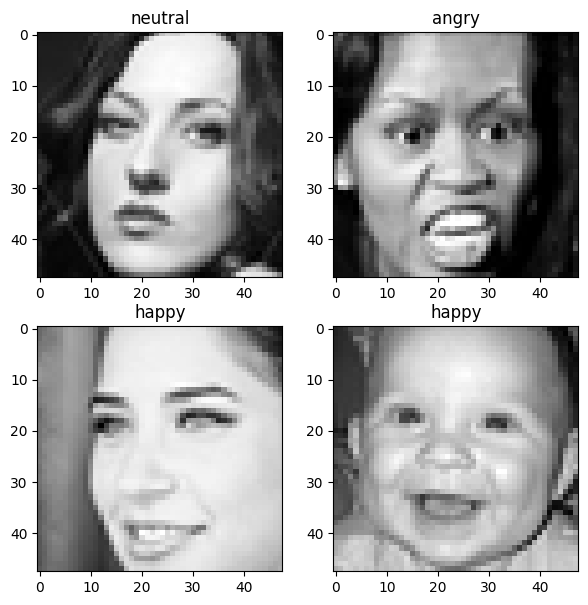

In [58]:

plt.figure(figsize = (7, 7))
for i in range(4):
  ax = plt.subplot(2, 2, i+1)
  random_int = random.choice(range(len(train_images_csv)))
  image = Image.open(train_images_csv['Image_list'][random_int])
  plt.imshow(image, cmap='gray')
  plt.title(train_images_csv['Emotion'][random_int])
  plt.axis(True)